In [1]:
import sys
sys.path.append("../wamuu")
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from instance import Instance
from utils import sweep

ModuleNotFoundError: No module named 'instance'

In [2]:
inst = Instance('../data/raw', 50, 1, 1, 1, 6)

Let's see what this instance looks like

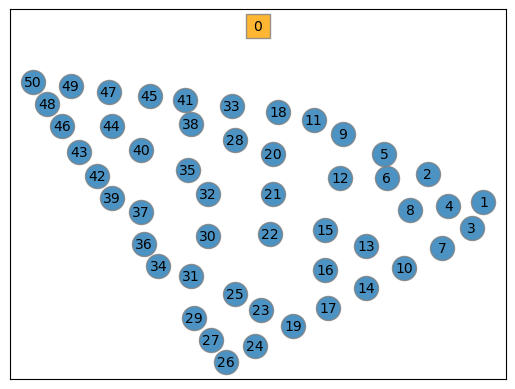

In [3]:
G = nx.Graph()
G.add_node(0, pos=(0,0))
for i in range(inst.n):
    G.add_node(i+1, pos=inst.turbs[i])
pos = nx.get_node_attributes(G, 'pos')
options = {'edgecolors': 'tab:gray', 'alpha': 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_shape='s', node_color='orange', **options)
nx.draw_networkx_nodes(G, pos, nodelist=range(1, inst.n+1), **options)
nx.draw_networkx_labels(G, pos, font_size=10)
pass

Let's execute the sweep algorithm

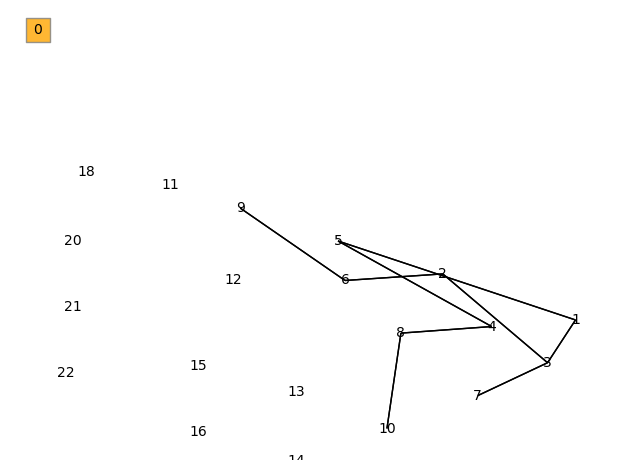

[[10, 8],
 [8, 10],
 [8, 4],
 [4, 8],
 [4, 5],
 [5, 4],
 [5, 1],
 [1, 5],
 [1, 3],
 [7, 3],
 [3, 1],
 [3, 7],
 [3, 2],
 [2, 3],
 [2, 6],
 [6, 2],
 [6, 9],
 [9, 6]]

In [21]:
msts = sweep(inst, 1, True, 10)
edges = []
# for mst in msts:
for a in msts[0]:
    for b in msts[0][a]:
        edges.append([a, b])
G = nx.Graph()
G.add_node(0, pos=(0,0))
for i in range(inst.n):
    G.add_node(i+1, pos=inst.turbs[i])
pos = nx.get_node_attributes(G, 'pos')
options = {'edgecolors': 'tab:gray', 'alpha': 0.8}
nx.draw_networkx_nodes(G, pos, nodelist=[0], node_shape='s', node_color='orange', **options)
# nx.draw_networkx_nodes(G, pos, nodelist=range(1, inst.n+1), **options)
nx.draw_networkx_labels(G, pos, font_size=10)
nx.draw_networkx_edges(G, pos, edgelist=edges)
plt.tight_layout()
plt.axis("off")
plt.show()
edges

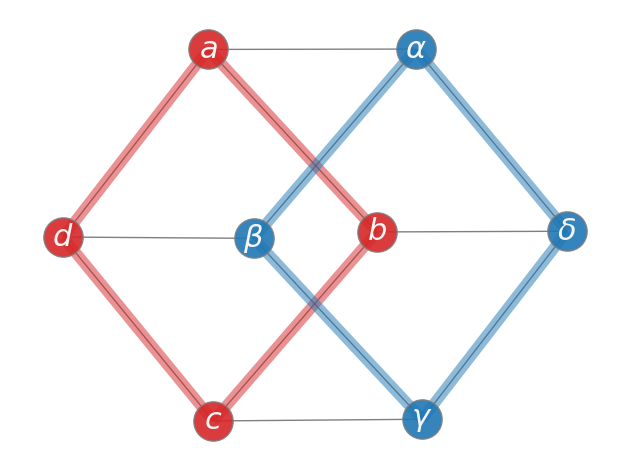

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

G = nx.cubical_graph()
pos = nx.spring_layout(G, seed=3113794652)  # positions for all nodes

# nodes
options = {"edgecolors": "tab:gray", "node_size": 800, "alpha": 0.9}
nx.draw_networkx_nodes(G, pos, nodelist=[0, 1, 2, 3], node_color="tab:red", **options)
nx.draw_networkx_nodes(G, pos, nodelist=[4, 5, 6, 7], node_color="tab:blue", **options)

# edges
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(0, 1), (1, 2), (2, 3), (3, 0)],
    width=8,
    alpha=0.5,
    edge_color="tab:red",
)
nx.draw_networkx_edges(
    G,
    pos,
    edgelist=[(4, 5), (5, 6), (6, 7), (7, 4)],
    width=8,
    alpha=0.5,
    edge_color="tab:blue",
)


# some math labels
labels = {}
labels[0] = r"$a$"
labels[1] = r"$b$"
labels[2] = r"$c$"
labels[3] = r"$d$"
labels[4] = r"$\alpha$"
labels[5] = r"$\beta$"
labels[6] = r"$\gamma$"
labels[7] = r"$\delta$"
nx.draw_networkx_labels(G, pos, labels, font_size=22, font_color="whitesmoke")

plt.tight_layout()
plt.axis("off")
plt.show()